In [86]:
import reproject
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

import matplotlib.pyplot as plt

import os
from astropy.wcs import WCS
from astropy.io import fits
import astropy.visualization.wcsaxes
from astropy.coordinates import SkyCoord


In [87]:
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredEllipse, AnchoredSizeBar

import astropy.units as u
from astropy.wcs.utils import proj_plane_pixel_scales

CORNERS = {
    "top right": 1,
    "top left": 2,
    "bottom left": 3,
    "bottom right": 4,
    "right": 5,
    "left": 6,
    "bottom": 8,
    "top": 9,
}

def add_scalebar(
    ax,
    length,
    label=None,
    corner="bottom right",
    frame=False,
    borderpad=0.4,
    pad=0.5,
    **kwargs,
):
    """Add a scale bar.

    Parameters
    ----------
    ax : :class:`~astropy.visualization.wcsaxes.WCSAxes`
        WCSAxes instance in which the scale bar is displayed. The WCS must be
        celestial.
    length : float or :class:`~astropy.units.Quantity`
        The length of the scalebar in degrees or an angular quantity
    label : str, optional
        Label to place below the scale bar
    corner : str, optional
        Where to place the scale bar. Acceptable values are:, ``'left'``,
        ``'right'``, ``'top'``, ``'bottom'``, ``'top left'``, ``'top right'``,
        ``'bottom left'`` and ``'bottom right'`` (default)
    frame : bool, optional
        Whether to display a frame behind the scale bar (default is ``False``)
    borderpad : float, optional
        Border padding, in fraction of the font size. Default is 0.4.
    pad : float, optional
        Padding around the scale bar, in fraction of the font size. Default is 0.5.
    kwargs
        Additional arguments are passed to
        :class:`mpl_toolkits.axes_grid1.anchored_artists.AnchoredSizeBar`.

    Notes
    -----
    This function may be inaccurate when:

    - The pixel scales at the reference pixel are different from the pixel scales
      within the image extent (e.g., when the reference pixel is well outside of
      the image extent and the projection is non-linear)
    - The pixel scales in the two directions are very different from each other
      (e.g., rectangular pixels)

    """
    if isinstance(length, u.Quantity):
        length = length.to(u.degree).value

    if ax.wcs.is_celestial:
        pix_scale = proj_plane_pixel_scales(ax.wcs)
        sx = pix_scale[0]
        sy = pix_scale[1]
        degrees_per_pixel = np.sqrt(sx * sy)
    else:
        raise ValueError("Cannot show scalebar when WCS is not celestial")

    length = length / degrees_per_pixel

    corner = CORNERS[corner]

    scalebar = AnchoredSizeBar(
        ax.transData,
        length,
        label,
        corner,
        pad=pad,
        borderpad=borderpad,
        sep=5,
        frameon=frame,
        **kwargs,
    )

    ax.add_artist(scalebar)

In [88]:
wcs_out

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 54.23328612034664  30.48452709879507  
CRPIX : 3375.4842222691104  -3440.927007532159  
PC1_1 PC1_2  : 0.9999733842260676  -0.007295946783343532  
PC2_1 PC2_2  : 0.007295946783343532  0.9999733842260676  
CDELT : -0.00047232419255135576  0.00047232419255135576  
NAXIS : 0  0

(<Quantity 56.07921 deg>, <Quantity 32.12659 deg>)


 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '24/10/55          ' to '1955-10-24''. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '24/10/55          ' to '1955-10-24''. [astropy.wcs.wcs]


'03h44m19.0104s +32d07m35.724s'

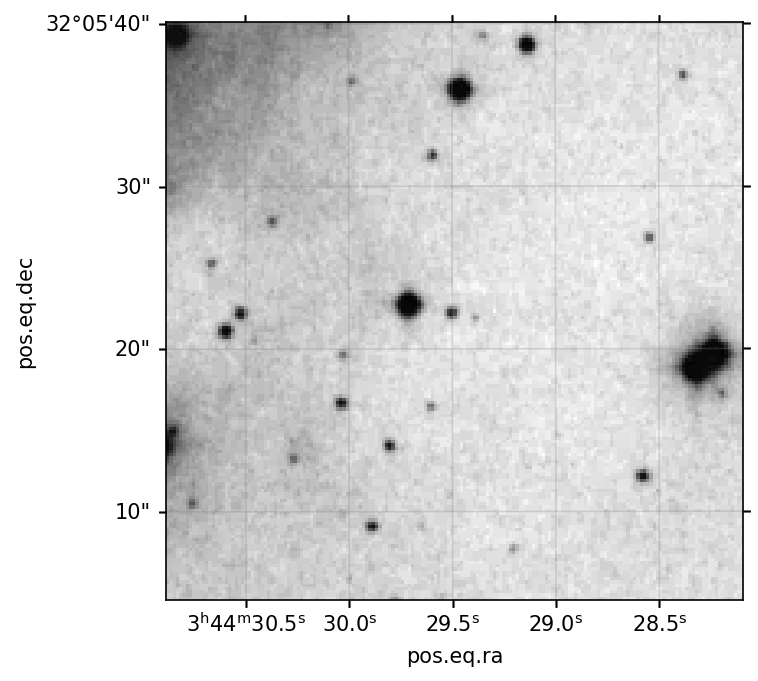

In [115]:
downloads_dir = "/Users/tsrice/Downloads"
filename = os.path.join(downloads_dir, "dss1.3.44.19.0104960000002+32.7.35.7240000000007.fits")

pf = fits.open(filename)
hdu = pf[0]
wcs_in = WCS(hdu.header)
# wcs_in = WCS(pf[0].header)
wcs_out, shape_out = find_optimal_celestial_wcs([hdu], auto_rotate=True)
# wcs_out_2, shape_out_2 = find_optimal_celestial_wcs([pf[1]])

# wcs_out, shape_out = find_optimal_celestial_wcs([pf[0]])

dss_array, footprint = reproject_interp(
    hdu, wcs_out_2, shape_out=shape_out
)

# ukirt_array, footprint = reproject_interp(
#     wf_hdu, wcs_out, shape_out=shape_out)
#     (hdu.data, wcs_in), wcs_out, shape_out=shape_out)

# dss_array.shape
# shape_out

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out_2)
ax.imshow(
    np.sqrt(hdu.data),
#     hdu.data, 
#     vmin=np.sqrt(1e2), 
#     vmax=np.sqrt(5.e5), 
    origin='lower',
    cmap='gray_r'
)
ax.grid(color='gray', ls='solid', alpha=0.25)

print(center)
# ax.get_transform('world')
coordy = SkyCoord(ra=56.079210*u.deg, dec=32.126590*u.deg)

# ax.scatter(*center, marker='+', color='r', lw=1.0, s=30, transform=ax.get_transform('world'), alpha=0.8)

coordy.to_string('hmsdms')

# xlims_world = [center[0] + 1.25*u.arcmin, center[0] - 1.25*u.arcmin]
# ylims_world = [center[1] - 1.1*u.arcmin, center[1] + 1.1*u.arcmin]

# world_coords = SkyCoord(ra=xlims_world, dec=ylims_world, frame='fk5')
# pixel_coords_x, pixel_coords_y = ax.wcs.world_to_pixel(world_coords)

# ax.set_xlim(pixel_coords_x)
# ax.set_ylim(pixel_coords_y)


In [23]:
downloads_dir = "/Users/tsrice/Downloads"
filename = os.path.join(downloads_dir, "dss1.3.44.19.0104960000002+32.7.35.7240000000007.fits")

pf = fits.open(filename)
wcs_in = WCS(pf[1].header)
hdu = pf[0]
wcs = WCS(hdu.header)


 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '24/10/55          ' to '1955-10-24''. [astropy.wcs.wcs]


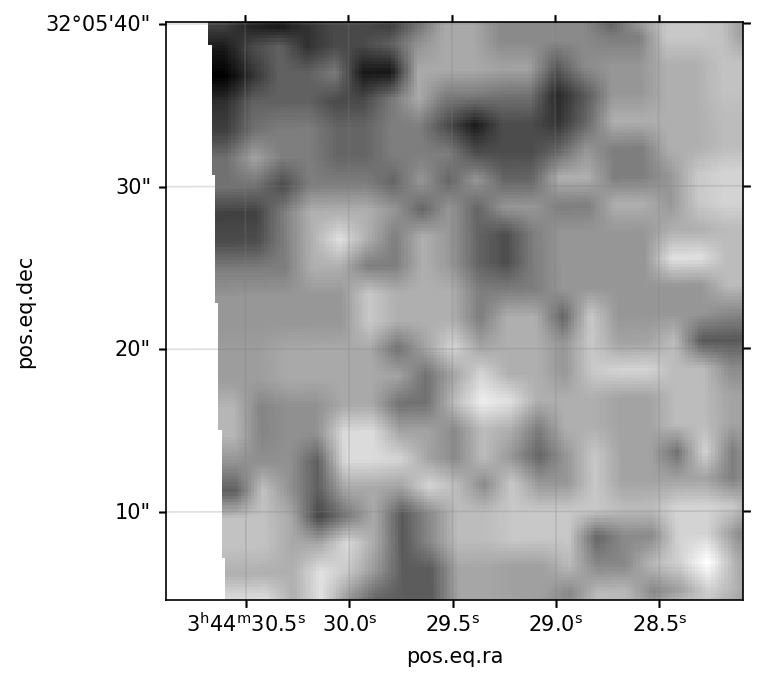

In [106]:
# show it raw

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out_2)
ax.imshow(
    dss_array,
#     np.sqrt(dss_array),
#     hdu.data, 
#     vmin=np.sqrt(1e2), 
#     vmax=np.sqrt(5.e5), 
    origin='lower',
    cmap='gray_r'
)
ax.grid(color='gray', ls='solid', alpha=0.25)

# ax.set_title("Optical (DSS) finding chart: 5 arcmin")
# add_scalebar(ax, 1 * u.arcmin, color='red', label='1 arcmin')

# ax.scatter(*center, marker='+', color='r', lw=1.0, s=300, transform=ax.get_transform('world'), alpha=0.8)


In [30]:
# filename = 'jb5g05ubq_flt.fits'  # HST/ACS image, with distortion

wcs_out, shape_out = find_optimal_celestial_wcs([pf[0]])
# wcs_in


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '24/10/55          ' to '1955-10-24''. [astropy.wcs.wcs]


In [22]:
reproject_interp?

In [32]:
dss_array, footprint = reproject_interp(
    hdu, wcs_out, shape_out=shape_out)
    
#     m17_hdus,
#                                         wcs_out, shape_out=shape_out,
#                                         reproject_function=reproject_interp)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '24/10/55          ' to '1955-10-24''. [astropy.wcs.wcs]


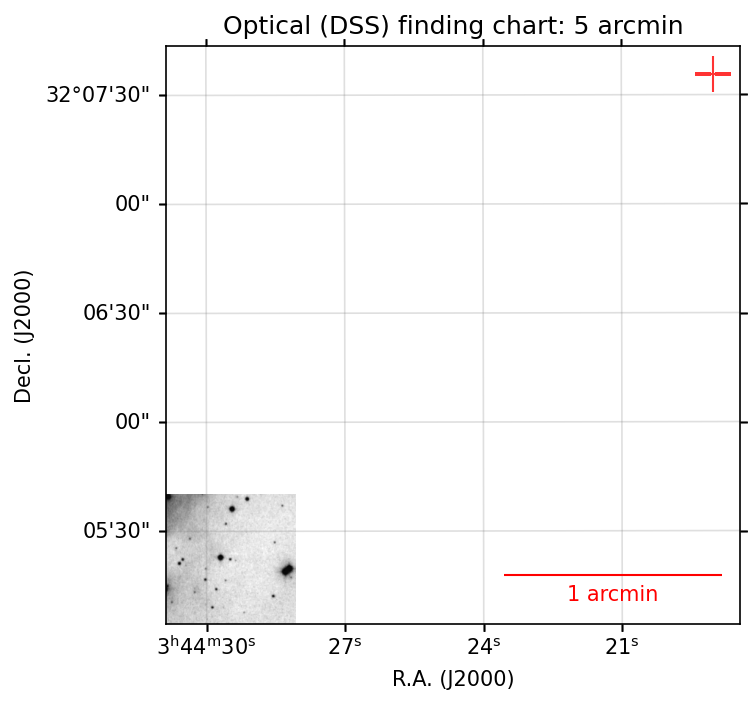

In [98]:
# from astropy.utils.data import get_pkg_data_filename
# from astropy.visualization.wcsaxes import add_scalebar

# filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')



fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out_2)
ax.imshow(
    np.sqrt(dss_array),
#     hdu.data, 
#     vmin=np.sqrt(1e2), 
#     vmax=np.sqrt(5.e5), 
    origin='lower',
    cmap='gray_r'
)
ax.grid(color='gray', ls='solid', alpha=0.25)
ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Decl. (J2000)')
ax.set_title("Optical (DSS) finding chart: 5 arcmin")
add_scalebar(ax, 1 * u.arcmin, color='red', label='1 arcmin')

center = 56.079210*u.deg, 32.126590*u.deg

ax.scatter(*center, marker='+', color='r', lw=1.0, s=300, transform=ax.get_transform('world'), alpha=0.8)

plt.show()

In [116]:
ax.grid?

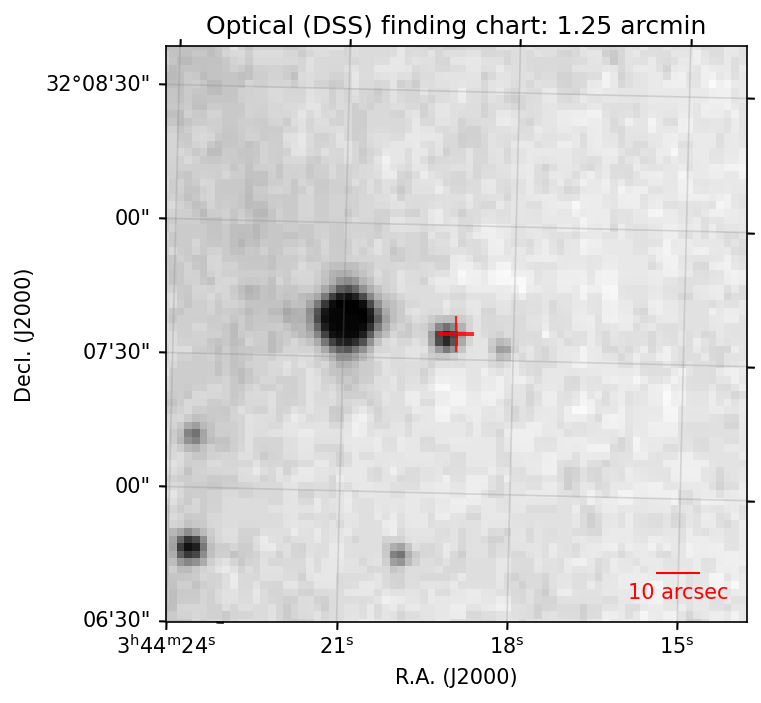

In [84]:
fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out)
ax.imshow(
    np.sqrt(dss_array),
#     hdu.data, 
#     vmin=np.sqrt(2.25e3), 
#     vmax=np.sqrt(2*2.e3), 
    origin='lower',
    cmap='gray_r'
)
ax.grid(color='gray', ls='solid', alpha=0.25)

xlims_world = [center[0] + 1.25*u.arcmin, center[0] - 1.25*u.arcmin]
ylims_world = [center[1] - 1.1*u.arcmin, center[1] + 1.1*u.arcmin]

world_coords = SkyCoord(ra=xlims_world, dec=ylims_world, frame='fk5')
pixel_coords_x, pixel_coords_y = ax.wcs.world_to_pixel(world_coords)

ax.set_xlim(pixel_coords_x)
ax.set_ylim(pixel_coords_y)

ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Decl. (J2000)')
ax.set_title("Optical (DSS) finding chart: 1.25 arcmin")
add_scalebar(ax, 10 * u.arcsec, color='red', label='10 arcsec')

ax.scatter(56.079210, 32.126590, marker='+', color='r', lw=1.0, s=300, transform=ax.get_transform('world'), alpha=0.8)

plt.show()

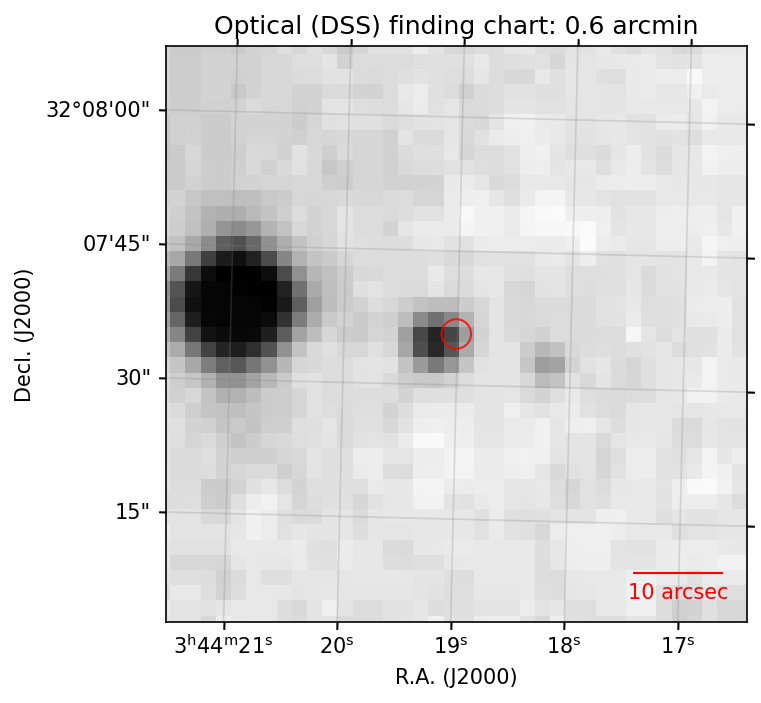

In [85]:
fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out)
ax.imshow(
    np.sqrt(dss_array),
#     hdu.data, 
#     vmin=np.sqrt(2.25e3), 
#     vmax=np.sqrt(2*2.e3), 
    origin='lower',
    cmap='gray_r'
)
ax.grid(color='gray', ls='solid', alpha=0.25)

xlims_world = [center[0] + 0.5*1.25*u.arcmin, center[0] - 0.5*1.25*u.arcmin]
ylims_world = [center[1] - 0.5*1.1*u.arcmin, center[1] + 0.5*1.1*u.arcmin]

world_coords = SkyCoord(ra=xlims_world, dec=ylims_world, frame='fk5')
pixel_coords_x, pixel_coords_y = ax.wcs.world_to_pixel(world_coords)

ax.set_xlim(pixel_coords_x)
ax.set_ylim(pixel_coords_y)

ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Decl. (J2000)')
ax.set_title("Optical (DSS) finding chart: 0.6 arcmin")
add_scalebar(ax, 10 * u.arcsec, color='red', label='10 arcsec')

ax.scatter(56.079210, 32.126590, marker='o', edgecolor='r', facecolor='none', lw=1, s=200, transform=ax.get_transform('world'), zorder=20, alpha=0.8)

plt.show()

In [90]:
images_dir = "/Users/tsrice/Documents/Variability_Project_2020/other/IMAGES"
filename = os.path.join(images_dir, "5arcmin_K_4639_247_22_20537_184.fits")

wf_hdu = fits.open(filename)[1]
# data = fits.open(filename)[1]
wf_wcs = WCS(wf_hdu.header)

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


In [91]:
from reproject import reproject_interp
ukirt_array, footprint = reproject_interp(
    wf_hdu, wcs_out, shape_out=shape_out)

In [93]:
wcs_out_2, shape_out_2 = find_optimal_celestial_wcs([wf_hdu])


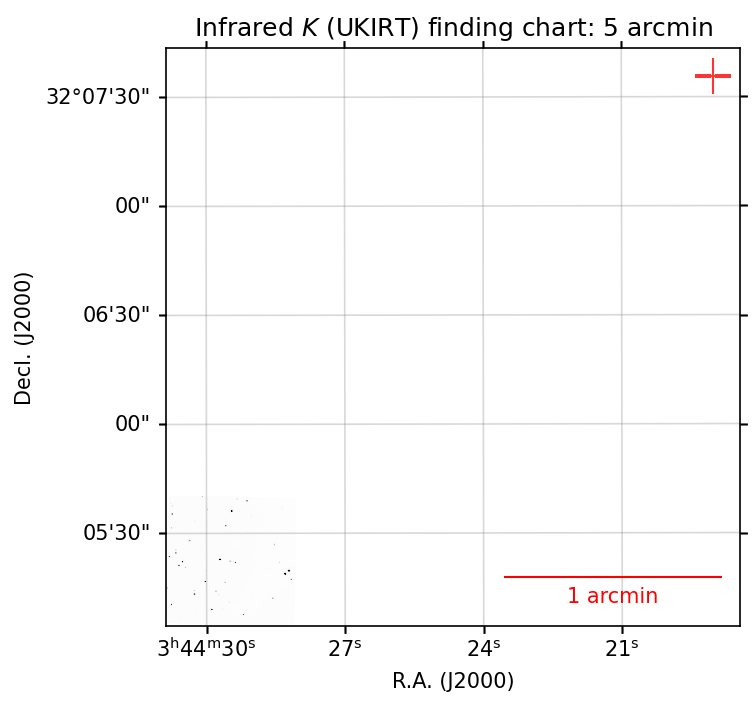

In [95]:


fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out_2)
ax.imshow(
    np.sqrt(ukirt_array), 
    vmin=47, 
    vmax=np.sqrt(2 * 2.e3), 
    origin='lower',
    cmap='gray_r'
)


ax.grid(color='gray', ls='solid', alpha=0.3)
ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Decl. (J2000)')

ax.set_title("Infrared $K$ (UKIRT) finding chart: 5 arcmin")
add_scalebar(ax, 1 * u.arcmin, color='red', label='1 arcmin')

center = 56.079210*u.deg, 32.126590*u.deg

ax.scatter(*center, marker='+', color='r', lw=1.0, s=300, transform=ax.get_transform('world'), alpha=0.8)

plt.show()

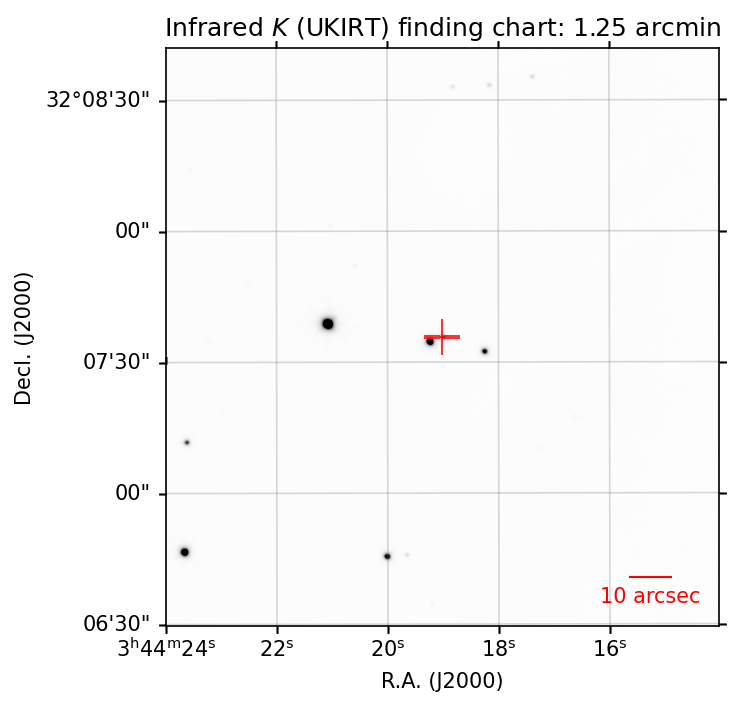

In [128]:
fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out)
ax.imshow(
    np.sqrt(ukirt_array), 
    vmin=47, 
    vmax=np.sqrt(2 * 2.e3), 
    origin='lower',
    cmap='gray_r'
)


ax.grid(color='gray', ls='solid', alpha=0.3)

xlims_world = [center[0] + 1.25*u.arcmin, center[0] - 1.25*u.arcmin]
ylims_world = [center[1] - 1.1*u.arcmin, center[1] + 1.1*u.arcmin]

world_coords = SkyCoord(ra=xlims_world, dec=ylims_world, frame='fk5')
pixel_coords_x, pixel_coords_y = ax.wcs.world_to_pixel(world_coords)

ax.set_xlim(pixel_coords_x)
ax.set_ylim(pixel_coords_y)

ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Decl. (J2000)')
ax.set_title("Infrared $K$ (UKIRT) finding chart: 1.25 arcmin")
add_scalebar(ax, 10 * u.arcsec, color='red', label='10 arcsec')

ax.scatter(56.079210, 32.126590, marker='+', color='r', lw=1.0, s=300, transform=ax.get_transform('world'), alpha=0.8)

plt.show()

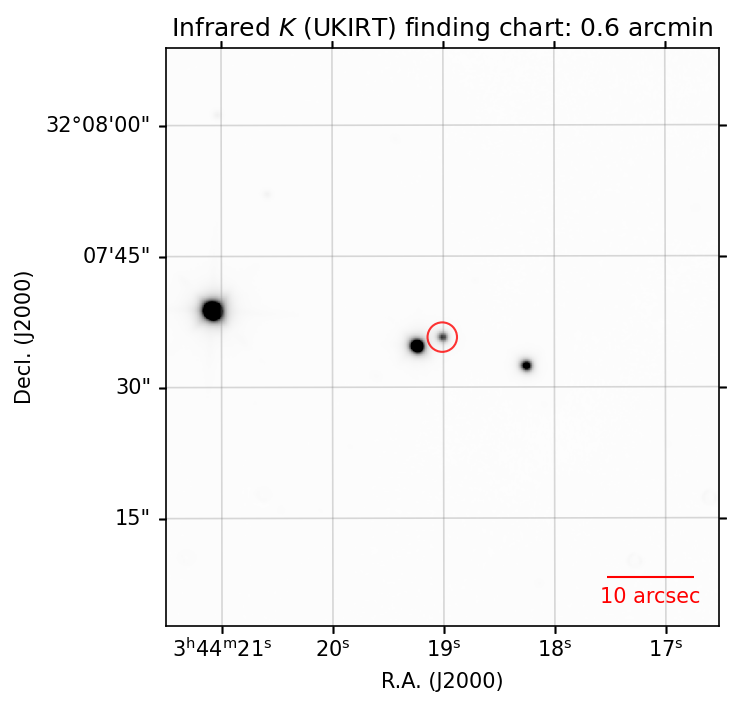

In [104]:
fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.subplot(projection=wcs_out)
ax.imshow(
    np.sqrt(ukirt_array), 
    vmin=47, 
    vmax=np.sqrt(2 * 2.e3), 
    origin='lower',
    cmap='gray_r'
)


ax.grid(color='gray', ls='solid', alpha=0.3)

xlims_world = [center[0] + 0.5*1.25*u.arcmin, center[0] - 0.5*1.25*u.arcmin]
ylims_world = [center[1] - 0.5*1.1*u.arcmin, center[1] + 0.5*1.1*u.arcmin]

world_coords = SkyCoord(ra=xlims_world, dec=ylims_world, frame='fk5')
pixel_coords_x, pixel_coords_y = ax.wcs.world_to_pixel(world_coords)

ax.set_xlim(pixel_coords_x)
ax.set_ylim(pixel_coords_y)

ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Decl. (J2000)')
ax.set_title("Infrared $K$ (UKIRT) finding chart: 0.6 arcmin")
add_scalebar(ax, 10 * u.arcsec, color='red', label='10 arcsec')

ax.scatter(56.079210, 32.126590, marker='o', edgecolor='r', facecolor='none', lw=1, s=200, transform=ax.get_transform('world'), zorder=20, alpha=0.8)

plt.show()

In [57]:
hdu

In [59]:
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2016-11-19T01:25:32' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'UKIRT             ' / Telescope name                                 
INSTRUME= 'WFCAM             ' / Instrument                                     
DHSVER  = 'UKDHS 2002 Oct 31 ' / Data handling version                          
HDTFILE = 'wfcam.hdt         ' / Name of global hdt file                        
OBSERVER= '                  ' / Observers names                                
USERID  = '                 

In [60]:
data.header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1493 / length of data axis 1                          
NAXIS2  =                 1492 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'WSAIMAGE'                                                            
CAMNUM  =                    1 / Number of WFCAM camera (1, 2, 3 or 4)          
HDTFILE2= 'wfcam2.hdt        ' / Name of camera-specific hdt file               
CTYPE1  = 'RA---ZPN'           / Algorithm type for axis 1                      
CTYPE2  = 'DEC--ZPN'           / Algorithm type for axis 2                      
CRPIX1  = 4.168800051087900E

In [74]:
import reproject

ModuleNotFoundError: No module named 'reproject'

In [76]:
import astropy.reproject

ModuleNotFoundError: No module named 'astropy.reproject'